In [1]:
# Copyright © Advanced Micro Devices, Inc., or its affiliates.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#     http://www.apache.org/licenses/LICENSE-2.0
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Basic Usage

## Prerequisites

The following code expects that Pillow is installed on your system.
Please execute the following commands to install it.

```
!pip install pillow
```

In [2]:

# !pip install pillow


## Read image

In [3]:
from cucim import CuImage

img = CuImage("input_tif/01_POS218_Z00_T00_R.tif")

/opt/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### See metadata

In [4]:
import json

print(img.is_loaded)                             # True if image data is loaded & available.
print(img.device)                                # A device type.
print(img.ndim)                                  # The number of dimensions.
print(img.dims)                                  # A string containing a list of dimensions being requested.
print(img.shape)                                 # A tuple of dimension sizes (in the order of `dims`).
print(img.size('XYC'))                           # Returns size as a tuple for the given dimension order.
print(img.dtype)                                 # The data type of the image.
print(img.channel_names)                         # A channel name list.
print(img.spacing())                             # Returns physical size in tuple.
print(img.spacing_units())                       # Units for each spacing element (size is same with `ndim`).
print(img.origin)                                # Physical location of (0, 0, 0) (size is always 3).
print(img.direction)                             # Direction cosines (size is always 3x3).
print(img.coord_sys)                             # Coordinate frame in which the direction cosines are measured. Available Coordinate frame is not finalized yet.
print(img.associated_images)                     # Returns a set of associated image names.
print(json.dumps(img.resolutions, indent=2))     # Returns a dict that includes resolution information.
print(json.dumps(img.metadata, indent=2))        # A metadata object as `dict`
print(img.raw_metadata)                          # A raw metadata string.

True
cpu
3
YXC
[1006, 1000, 4]
[1000, 1006, 4]
<cucim.clara.DLDataType code:DLUInt(1) bits:8 lanes:1>
['R', 'G', 'B', 'A']
[169.3333282470703, 169.3333282470703, 1.0]
['micrometer', 'micrometer', 'color']
[0.0, 0.0, 0.0]
[[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]
LPS
set()
{
  "level_count": 1,
  "level_dimensions": [
    [
      1000,
      1006
    ]
  ],
  "level_downsamples": [
    1.0
  ],
  "level_tile_sizes": [
    [
      0,
      0
    ]
  ]
}
{
  "cucim": {
    "associated_images": [],
    "channel_names": [
      "R",
      "G",
      "B",
      "A"
    ],
    "coord_sys": "LPS",
    "dims": "YXC",
    "direction": [
      [
        1.0,
        0.0,
        0.0
      ],
      [
        0.0,
        1.0,
        0.0
      ],
      [
        0.0,
        0.0,
        1.0
      ]
    ],
    "dtype": {
      "bits": 8,
      "code": 1,
      "lanes": 1
    },
    "ndim": 3,
    "origin": [
      0.0,
      0.0,
      0.0
    ],
    "path": "input_tif/01_POS218_Z00_T00_

### Read region

Please keep in mind that values for `location` is based on level-0 resolution (the largest resolution).

In [5]:
# Read whole slide at the lowest resolution
resolutions = img.resolutions
level_dimensions = resolutions["level_dimensions"]
level_count = resolutions["level_count"]
region = img.read_region(location=[0,0], size=level_dimensions[level_count - 1], level=level_count - 1)
print("level dimensions",level_dimensions)
print("level count",level_count)
region.save("thumbnail.ppm")  # currently, cuCIM can save image with .ppm format.

level dimensions ((1000, 1006),)
level count 1


[Warning] Loading image('input_tif/01_POS218_Z00_T00_R.tif') with a slow-path. The pixel format of the loaded image would be RGBA (4 channels) instead of RGB!


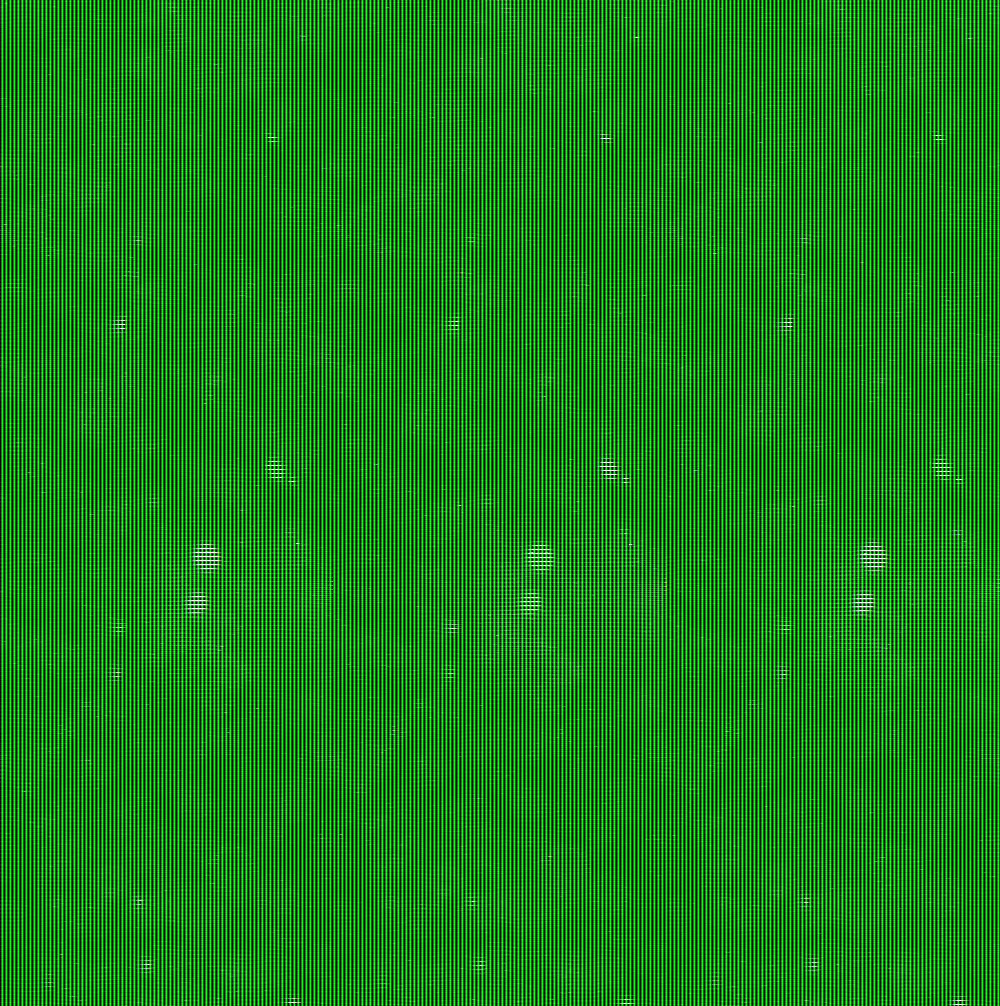

In [6]:
from PIL import Image
Image.open("thumbnail.ppm")

In [7]:
region = img.read_region([100,200], [200,200], 0)
region.save("test.ppm")

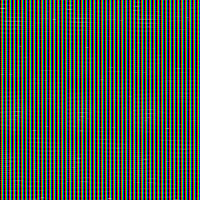

In [8]:
from PIL import Image
Image.open("test.ppm")

### `__array_interface__` support

In [9]:
import numpy as np
np_arr = np.array([1,2,3])
print(np_arr.__array_interface__)

{'data': (69429760, False), 'strides': None, 'descr': [('', '<i8')], 'typestr': '<i8', 'shape': (3,), 'version': 3}


As you can see from the above result, a NumPy array has `__array_interface__` property.

A Python object that has `__array_interface__` property is considered as a NumPy array and can be converted to a NumPy array through `np.asarray(obj)` method.

[\_\_array_interface__](https://numpy.org/doc/stable/reference/arrays.interface.html) is supported in CuImage object so the following code works to show the image in the Jupyter notebook.

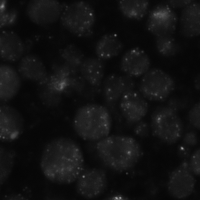

In [10]:
np_img_arr = np.asarray(region)
Image.fromarray(np_img_arr)

### `__cuda_array_interface__` support

In [11]:
import cupy as cp
cp_arr = cp.array([1,2,3])
print(cp_arr.__cuda_array_interface__)

{'shape': (3,), 'typestr': '<i8', 'descr': [('', '<i8')], 'stream': 1, 'version': 3, 'strides': None, 'data': (134622669176832, False)}


A CuPy array has `__cuda_array_interface__` property.

A Python object that has `__cuda_array_interface__` property is considered as a CUDA array-like object and can be converted to CuPy array through `cp.asarray(obj)` method.

[\_\_cuda_array_interface__](https://numba.readthedocs.io/en/stable/cuda/cuda_array_interface.html) is also supported in CuImage object if the user specify `device='cuda'` in `read_region()` method.

The following code shows how to load image to GPU memory and visualize in the Jupyter notebook.

cuda
{'data': (134588200386560, False), 'strides': None, 'descr': [('', '|u1')], 'typestr': '|u1', 'shape': (1006, 1000, 4), 'version': 3, 'mask': None, 'stream': 1}


[Warning] Loading image('input_tif/01_POS218_Z00_T00_R.tif') with a slow-path. The pixel format of the loaded image would be RGBA (4 channels) instead of RGB!


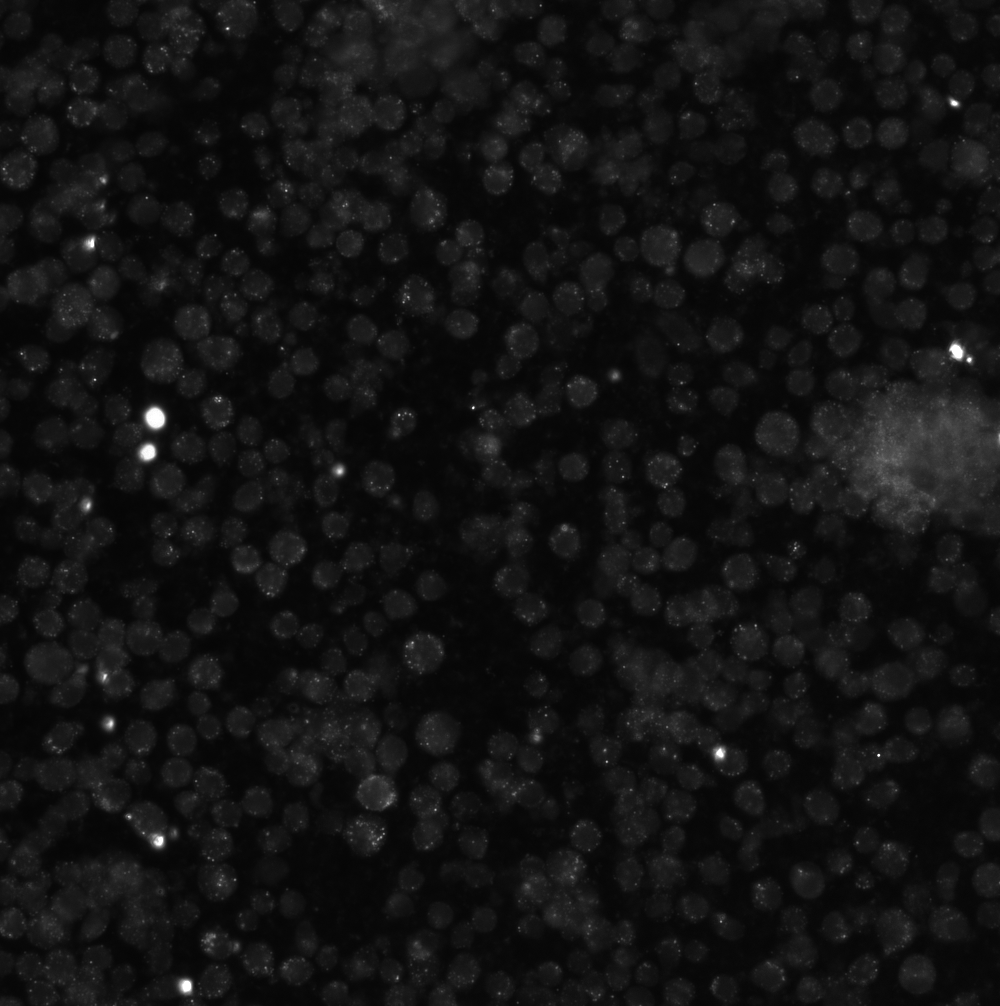

In [12]:
import cupy as cp
from cucim import CuImage

img = CuImage("input_tif/01_POS218_Z00_T00_R.tif")
resolutions = img.resolutions
level_dimensions = resolutions["level_dimensions"]
level_count = resolutions["level_count"]

region = img.read_region([0,0], level_dimensions[level_count - 1], level_count - 1, device="cuda")

print(region.device)
print(region.__cuda_array_interface__)

cupy_arr = cp.asarray(region)
Image.fromarray(cupy_arr.get())

### Associated images

Some image formats such as Philips TIFF and Aperio SVS have associated images (Macro or Label images) in addition to the multi-resolution images.

Let's assume that the image has only `macro` image.

```python
>>> img.associated_images
{'macro'}

>>> 'macro' in img.associated_images
True

>>> macro_image = img.associated_image('macro')
<cucim.CuImage path:>
```
You can see the macro image by using the following statements:

```python
>>> import numpy as np
>>> from PIL import Image
>>> np_img_arr = np.asarray(macro_image)
>>> Image.fromarray(np_img_arr)   
```

You can check if an associated image with a specific name (e.g., `label`) exists or not, like below:
```python
>>> img.associated_image('label')
<cucim.CuImage path:<null>>

>>> 'label' in img.associated_images
False

>>> if not img.associated_image('label'):
>>>     print("There is no associated image named 'label'!")
There is no associated image named 'label'!
```